<a href="https://colab.research.google.com/github/IGVF/seqspec/blob/main/examples/seqspec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone --quiet https://github.com/igvf/seqspec

In [2]:
!cd seqspec && pip --quiet install .

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [3]:
!seqspec

usage: seqspec [-h] <CMD> ...

seqspec 0.0.0: Format sequence specification files

positional arguments:
  <CMD>
    check     validate seqspec file
    format    format seqspec file
    print     print seqspec file

optional arguments:
  -h, --help  show this help message and exit


In [4]:
!head seqspec/assays/10x-RNA-v2/spec.yaml

!Assay
name: 10x-RNA-v2
doi: https://doi.org/10.1038/ncomms14049
publication_date: null
description: The 10x Genomics Chromium Single Cell 3' Solution V2 chemistry
modalities:
- RNA
lib_struct: https://teichlab.github.io/scg_lib_structs/methods_html/10xChromium3.html
assay_spec:
  - !Region


In [5]:
!seqspec print /content/seqspec/assays/10x-RNA-v2/spec.yaml

# 10x-RNA-v2
- DOI: [https://doi.org/10.1038/ncomms14049](https://doi.org/10.1038/ncomms14049)
- Description: The 10x Genomics Chromium Single Cell 3' Solution V2 chemistry
- Modalities: RNA
    
## Final Library
###### RNA
<pre style="overflow-x: auto; text-align: left; background-color: #f6f8fa">AATGATACGGCGACCACCGAGATCTACACTCTTTCCCTACACGACGCTCTTCCGATCTNNNNNNNNNNNNNNNNNNNNNNNNNNXXAGATCGGAAGAGCACACGTCTGAACTCCAGTCACNNNNNNNNATCTCGTATGCCGTCTTCTGCTTG</pre>
1. <details><summary>Illumina P5</summary>

   - sequence_type: fixed
   - sequence: <pre style="overflow-x: auto; text-align: left; margin: 0; display: inline;">AATGATACGGCGACCACCGAGATCTACAC</pre>
   - min_len: 29
   - max_len: 29
   - onlist: None
   </details>
2. <details><summary>Truseq Read 1</summary>

   - sequence_type: fixed
   - sequence: <pre style="overflow-x: auto; text-align: left; margin: 0; display: inline;">TCTTTCCCTACACGACGCTCTTCCGATCT</pre>
   - min_len: 10
   - max_len: 10
   - onlist: None
   </details>
3. <details>

In [6]:
!seqspec check /content/seqspec/assays/10x-RNA-v2/spec.yaml

[error 1] None is not of type 'string' in spec['publication_date']
[error 2] None is not of type 'string' in spec['assay_spec'][0]['join']['regions'][2]['onlist']['md5']
[error 3] None is not of type 'string' in spec['assay_spec'][0]['join']['regions'][7]['onlist']['md5']


# Plot assays over time

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [49]:
!for s in /content/seqspec/assays/*/spec.yaml; do grep -e name -e publication_date $s | head -2 | sed 's/\: /:/g' | cut -f 2 -d":" | tr '\n' '\t' && echo -e "\n"; done > dates.txt

In [34]:
df = pd.read_csv("dates.txt", header=None, names=["assay", "publication_date", "bad"], sep="\t").drop(columns=["bad"]).dropna()

In [47]:
fmt = "%d %B %Y"
dates = [datetime.strptime(d, fmt) for d in df["publication_date"]]
descriptions = df["assay"]
levels = np.tile([-9,9-7,7,-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/8)))[:len(dates)]

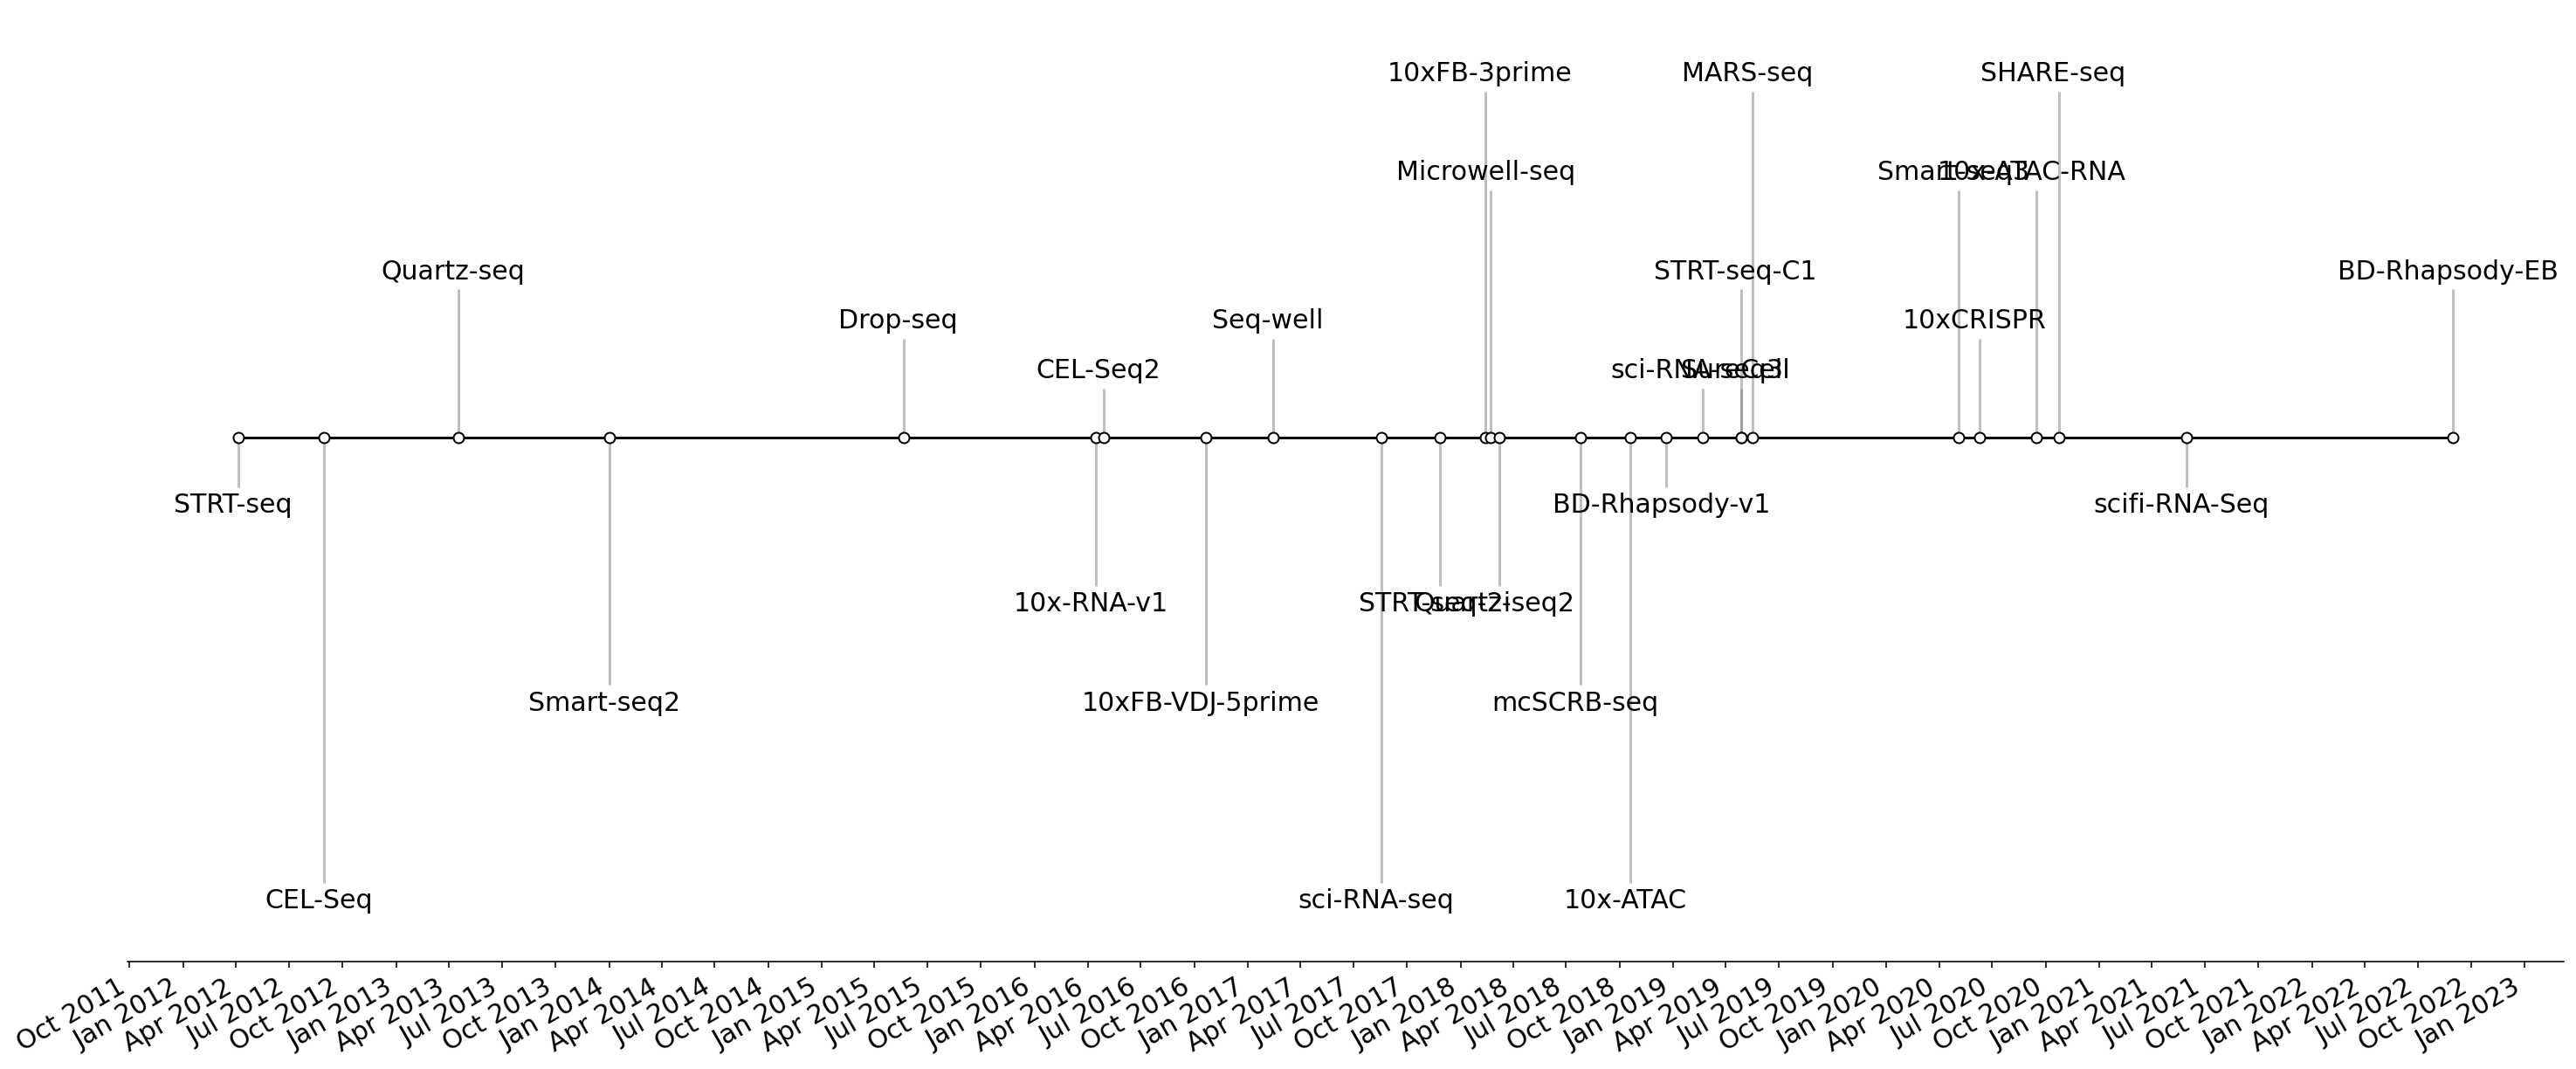

In [48]:
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(25, 10))

ax.vlines(dates, 0, levels, color="grey", alpha=0.5)  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")  # Baseline and markers on it.
# ax.plot(new_cases.index.values, new_cases.values/new_cases.max()*10, color="lightgrey", label="New cases", zorder = -2)
# annotate lines
for d, l, desc in zip(dates, levels, descriptions):

  weight = "light"
  # if tl["highlight"]:
  #   weight = "bold"
  ax.annotate(desc, xy=(d, l),
              xytext=(-3, np.sign(l)*3), textcoords="offset points",
              horizontalalignment="center",
              verticalalignment="bottom" if l > 0 else "top", weight=weight)

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# ax.axvline(x=datetime.strptime("January 01, 2021", fmt), color="lightgrey", linestyle="--", zorder=-1)
ax.margins(y=0.1)
ax.set(**{
    "title": ""
})

fig.show()